PS3_12232253_殷玉领

In [338]:
# Prerequisites

# Load modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import xarray as xr
import glob
import hvplot.xarray
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

# Show plots in the notebook
%matplotlib inline

# Read data file
Methane_Data = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")

# Check the data
Methane_Data.head()

<xarray.Dataset>
Dimensions:                  (time: 5, bnds: 2, lat: 5, lon: 5, pressure: 5)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 -162.5 -157.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

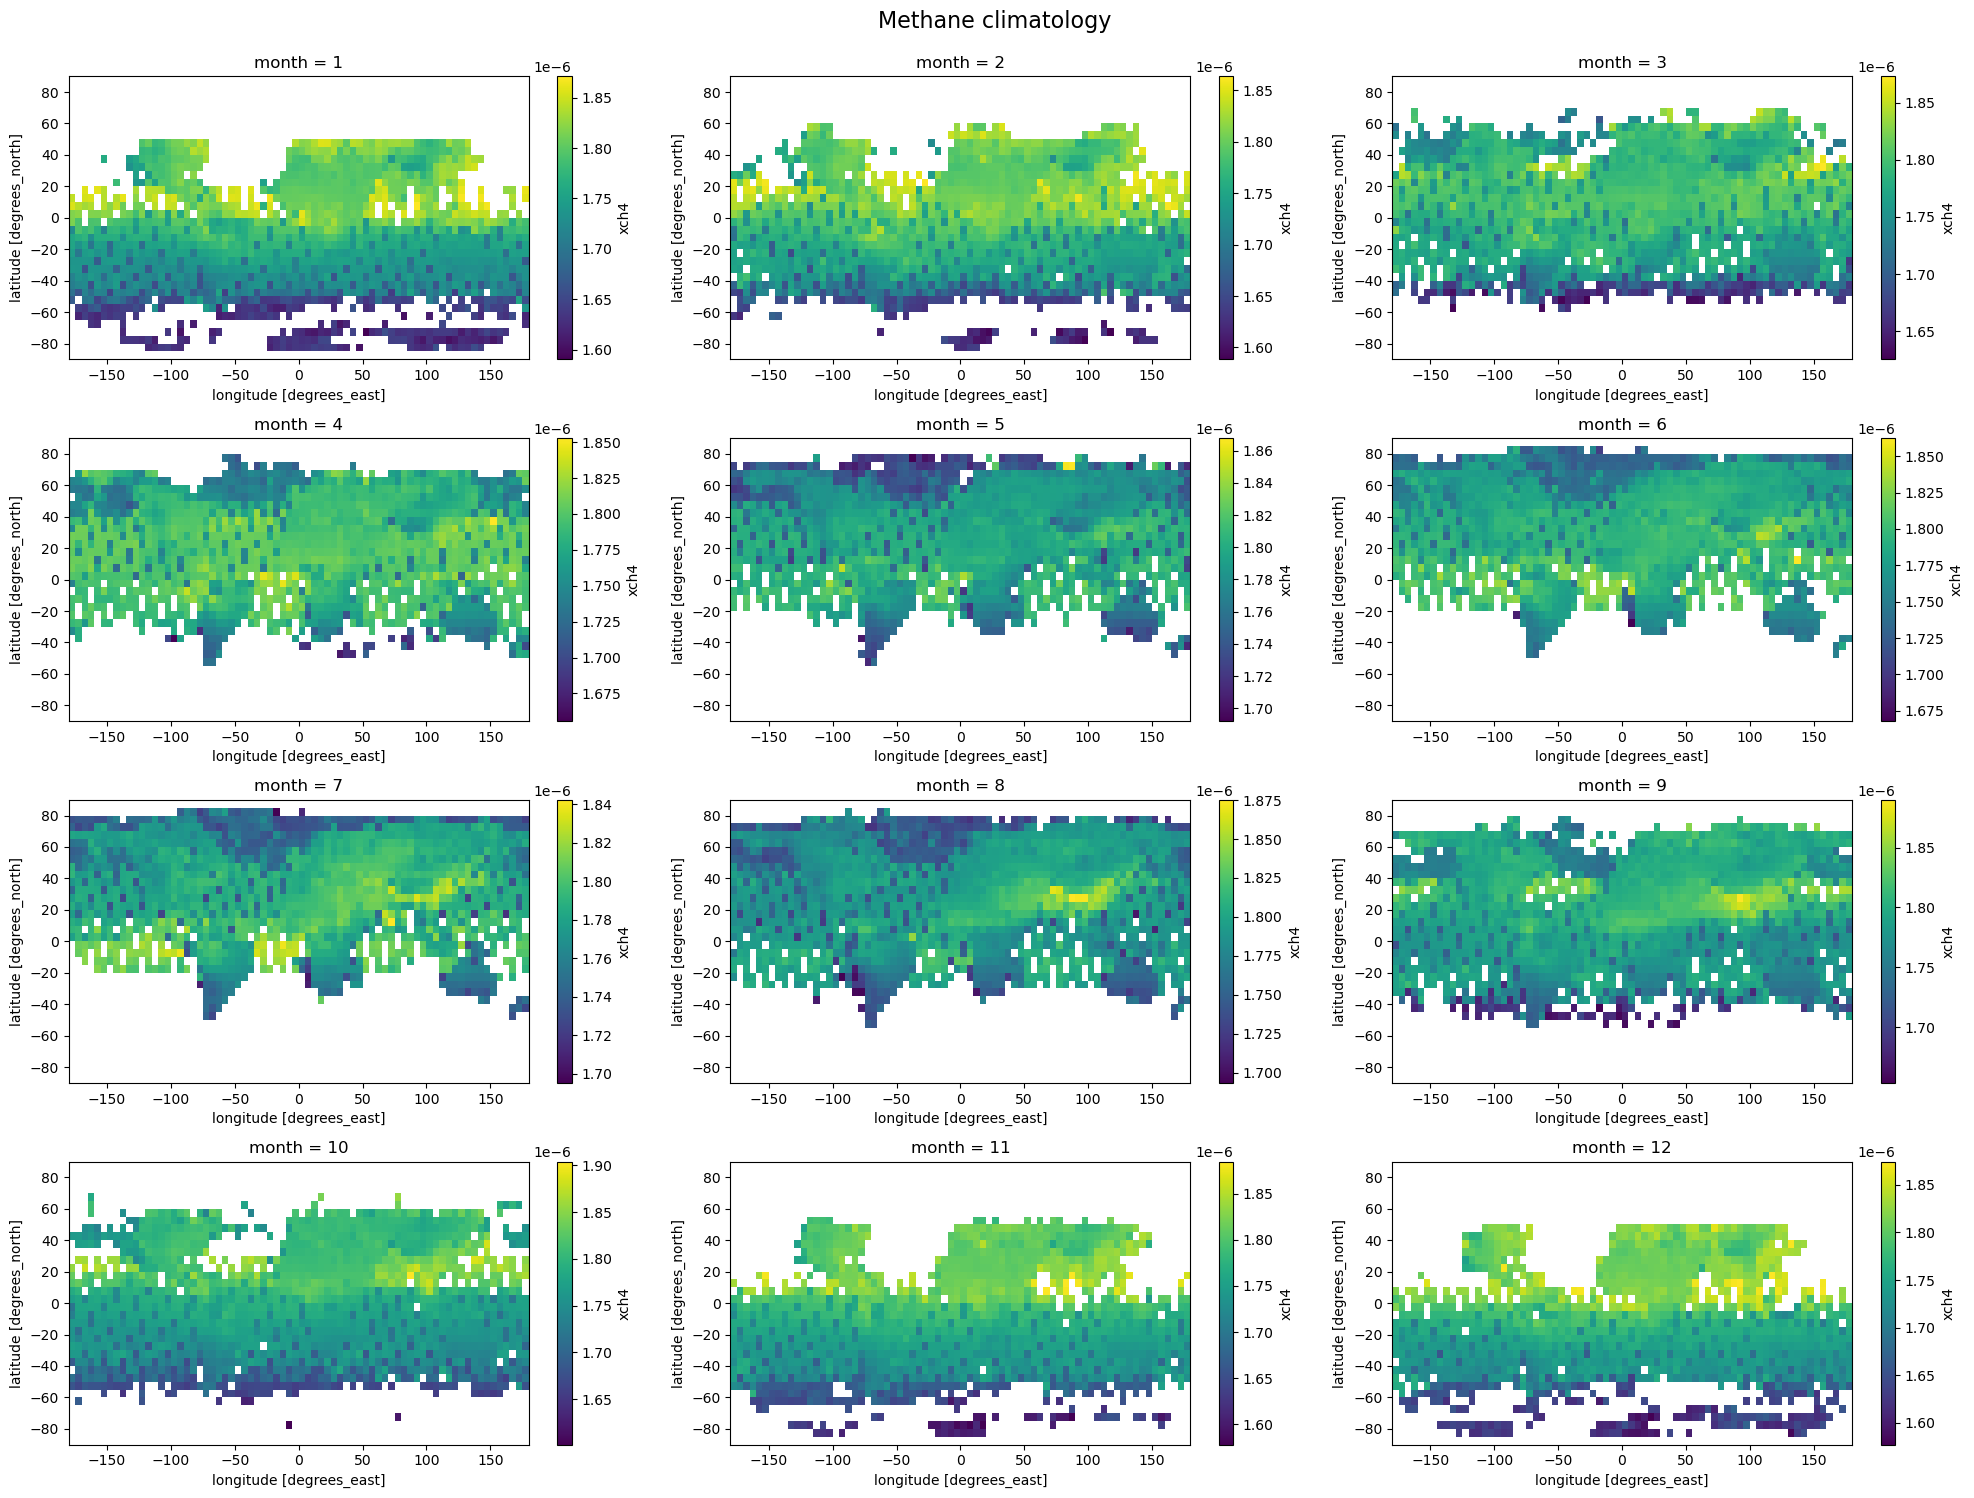

In [339]:
#Question1_1

#设置画板
plt.figure(figsize=(20,15),dpi=100)

# 利用循环作图
for i in range(1,13):
    plt.subplot(4,3,i)
    Methane_Data.xch4.groupby(Methane_Data.time.dt.month).mean()[i-1].plot()
    
# 大标题
plt.suptitle('Methane climatology', verticalalignment='bottom', fontsize=16)   
plt.tight_layout()
plt.show()    

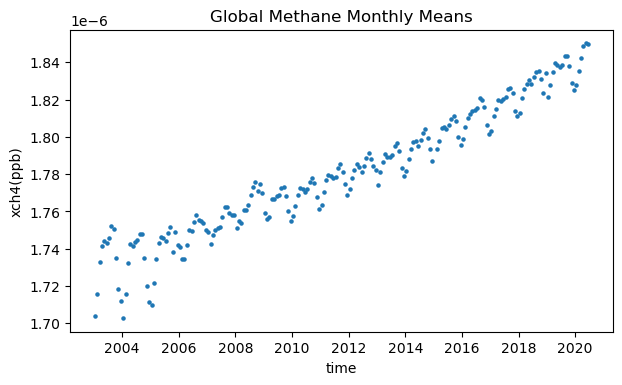

In [340]:
#Question1_2

#设置画板
plt.figure(figsize=(7,4),dpi=100)

#求全球平均CH4含量，作时间序列散点图
Methane_mean = Methane_Data.xch4.mean(dim=['lat', 'lon']).sel(
    time=slice("2003-01", "2020-12"))
plt.scatter(Methane_mean['time'].data,Methane_mean,marker='o',s=5)

#加标题，显示图
plt.xlabel('time')
plt.ylabel('xch4(ppb)')
plt.title('Global Methane Monthly Means')
plt.show()

#描述结果
#1、2003-01 到 2020-06 期间，大气中CH4浓度含量不断增加，并且增加的速度在2016年后有增大的趋势；
#2、2003-01 到 2020-06 期间，大气中CH4浓度含量一直在季节性波动，可能为冬季人类取暖活动的影响；
#3、2003-2006年，大气中CH4浓度波动最为剧烈，其他年份的波动都相对稳定。

D:\APP4\Anaconda\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\APP4\Anaconda\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


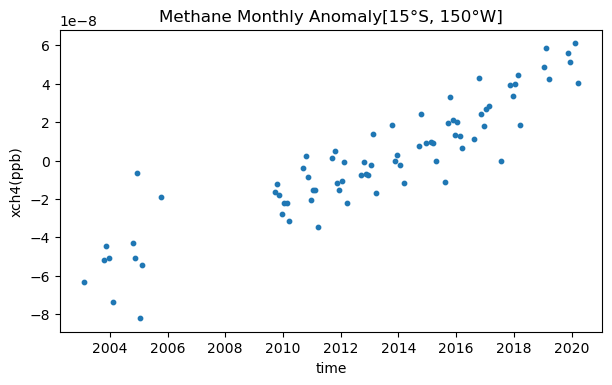

In [341]:
#Question1_3

#设置画板
plt.figure(figsize=(7,4),dpi=100)

# 按月份对数据分组
group_data = Methane_Data.xch4.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly 
xch4_anom = (group_data - group_data.mean(dim='time')).sel(time=slice("2003-01", "2020-12"))
xch4_anom_region = xch4_anom.sel(lon=-150, lat=-15, method='nearest')
plt.scatter(xch4_anom_region.time.data,xch4_anom_region,marker='o',s=10)


#加标题，显示图
plt.xlabel('time')
plt.ylabel('xch4(ppb)')
plt.title('Methane Monthly Anomaly[15°S, 150°W]')
plt.show()


#描述结果
#1、2007年以前CH4浓度含量呈下降趋势之后一直呈升高趋势；
#2、2003-01 到 2020-06 期间，大气中CH4浓度含量还是存在波动，可能为与地球活动等原因有关；
#3、2003-2006年，大气中CH4浓度波动最为剧烈，其他年份的波动都相对稳定。
#4、数据在06年到10年间缺失，导致点不连续。

In [342]:
#加载文件数据
Nino_Data = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
Nino_Data.head()

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 5, time: 5)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 1960-05-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

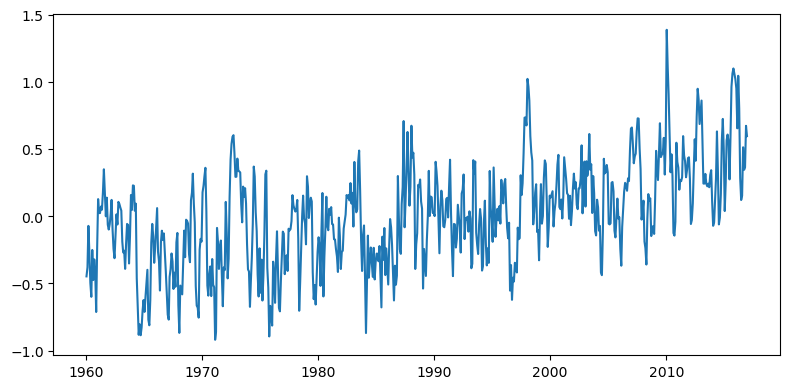

In [343]:
#Question2_1

#将数据按月份分组
Nino_group_data = Nino_Data.sst.groupby('time.month')

#求月气候学
Nino_climatology = Nino_group_data.mean(dim='time')

#求异常值
Nino_anom = Nino_group_data-Nino_climatology

#选区域
Nino_anom_region = Nino_anom.sel(lat=slice(-5, 5), lon=slice(-170+180, -120+180)).mean(dim=['lat', 'lon'])

#绘制区域异常值，逐月
plt.figure(figsize=(8,4),dpi=100)
plt.plot(Nino_anom_region.time,Nino_anom_region)
plt.tight_layout()
plt.show()

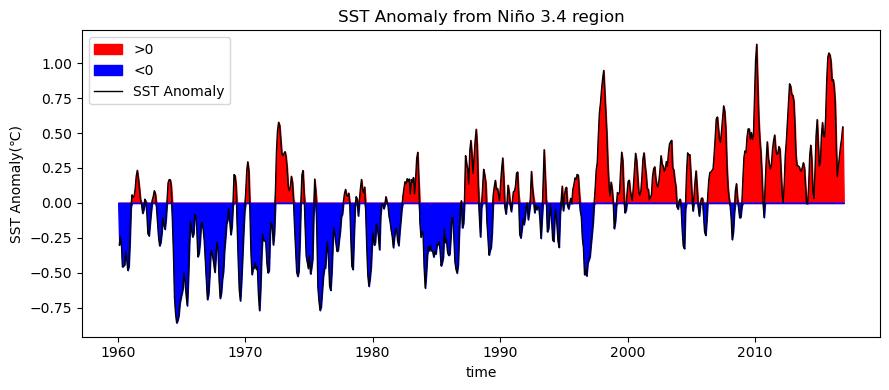

In [344]:
#Question2_2

#设置画板
plt.figure(figsize=(9,4),dpi=100)

#异常值3个月的滑动平均值（1960-2016）
Nino_anom_rolling = Nino_anom_region.rolling(time=3, center=True).mean()

#与王国梁同学讨论得出填充颜色的思路

#找出大于0的值和小于0的值 
#xr.where（con，x，y） 满足条件返回x，不满足返回y（确实值也返回y）
Nino_anom_rolling_1 = xr.where(Nino_anom_rolling.data>0,Nino_anom_rolling,0)
Nino_anom_rolling_2 = xr.where(Nino_anom_rolling.data<0,Nino_anom_rolling,0)

#画图，并将0两侧填充不同颜色（>0,红，<0，蓝）
plt.fill_between(x=Nino_anom_rolling.time.data, y1=Nino_anom_rolling_1.data, y2=0,color='r')
plt.fill_between(x=Nino_anom_rolling.time.data, y1=Nino_anom_rolling_2.data, y2=0,color='b')
plt.plot(Nino_anom_rolling.time.data,Nino_anom_rolling,'k',linewidth =1)

#添加标题和坐标名称，展示
plt.xlabel('time')
plt.ylabel('SST Anomaly(℃)')
plt.title('SST Anomaly from Niño 3.4 region')
plt.legend(['>0','<0','SST Anomaly'])
plt.tight_layout()
plt.show()

In [345]:
#Question3 数据预处理（1）

#0. 数据说明：
#1. 所找的数据为NASA提供的全球二氧化碳含量摩尔分数（Lat（-60，90），Lon（-180，180））；
#2. 从2002.09-2012年2月，每个月一个nc文件；
#3. 由于按月份建立文件，所以每个nc文件中并没有时间序列，需要自己添加；
#4. 摩尔分数（mole fraction）：混合物中溶质B的物质的量与混合物各组分物质的量之和的比值。

#数据预处理：
#合并所有nc文件

#找到所有文件的路径
nc_path = glob.glob("Data\*.nc4")
new_nc = []
new_nc_time = []

#读取数据，暂存
for i in range(len(nc_path)):
     CO2=xr.open_dataset(nc_path[i])['mole_fraction_of_carbon_dioxide_in_free_troposphere']
     new_nc.append((CO2))
    
#用concat，按时间合并数据
da=xr.concat(new_nc,dim='time')

#输出合并后的nc文件
da.to_netcdf('Data\\CO2.nc')

#查看nc文件
CO2=xr.open_dataset('Data\\CO2.nc')
CO2.head()

<xarray.Dataset>
Dimensions:                                              (Latitude: 5, Longitude: 5, time: 5)
Coordinates:
  * Latitude                                             (Latitude) float32 8...
  * Longitude                                            (Longitude) float32 ...
Dimensions without coordinates: time
Data variables:
    mole_fraction_of_carbon_dioxide_in_free_troposphere  (time, Latitude, Longitude) float32 ...

In [346]:
#Question3 数据预处理（2）

#为合并后的文件添加时间序列

#创建时间序列（20020901-20120201）
CO2 = CO2.mole_fraction_of_carbon_dioxide_in_free_troposphere
time = pd.date_range(start="20020901", end="20120201", freq="MS") 

#给array赋值属性
lat=CO2.Latitude
lon=CO2.Longitude+180   #Lon(0~360)
Carbon_dioxide = xr.DataArray(CO2, coords=[time,lat,lon], dims=['time','lat','lon'])

#查看
Carbon_dioxide.head()

<xarray.DataArray 'mole_fraction_of_carbon_dioxide_in_free_troposphere' (time: 5, lat: 5, lon: 5)>
array([[[       nan,        nan,        nan,        nan,        nan],
        [       nan,        nan, 0.00038273, 0.00037368,        nan],
        [0.00037554, 0.00037327, 0.00037272, 0.00037432, 0.00037006],
        [0.00037437, 0.0003695 , 0.00037247, 0.00037464, 0.00036873],
        [0.00037301, 0.0003733 , 0.00037315, 0.00037369, 0.0003747 ]],

       [[       nan,        nan,        nan,        nan,        nan],
        [0.00037659,        nan, 0.00036975, 0.00036778, 0.00036965],
        [0.00037266, 0.00037659, 0.00037248, 0.00036921, 0.00036897],
        [0.0003708 , 0.00036497, 0.0003687 , 0.00036945, 0.00036869],
        [0.00036996, 0.00037114, 0.00037272, 0.00037284, 0.00037318]],

       [[       nan, 0.00037144,        nan,        nan,        nan],
        [       nan, 0.00037681, 0.00037563, 0.00037148, 0.00037216],
        [0.00037254, 0.00037149, 0.00037254, 0.00037121, 0.000371  ],
        [0.00037057, 0.00037052, 0.00037143, 0.00037226, 0.00036926],
        [0.0003703 , 0.00036983, 0.000372  , 0.00036993, 0.00037184]],

       [[       nan,        nan,        nan,        nan,        nan],
        [0.00037359, 0.00036504,        nan,        nan, 0.00036641],
        [0.00037225, 0.00036657, 0.00036645, 0.00037243, 0.00037029],
        [0.00037231, 0.00037045, 0.00037125, 0.00037306, 0.00036925],
        [0.000371  , 0.00037026, 0.00036926, 0.00037059, 0.00037043]],

       [[       nan, 0.00035916,        nan,        nan,        nan],
        [0.00037313, 0.00037054, 0.00036723, 0.00038114, 0.00035684],
        [0.00037022, 0.00036309, 0.00037068, 0.00036212,        nan],
        [0.00036029, 0.00037197, 0.00037021, 0.00036881, 0.00037176],
        [0.00037015, 0.00037127, 0.00036718, 0.00036717, 0.00037015]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-10-01 ... 2003-01-01
  * lat      (lat) float32 89.5 88.0 86.0 84.0 82.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0
Attributes:
    long_name:  mole_fraction_of_carbon_dioxide_in_free_troposphere

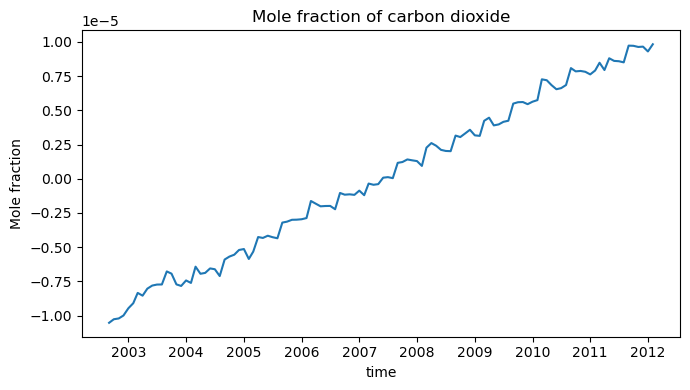

In [347]:
#Question3_1

#世界平均异常值随时间变化

#将数据按月份分组
Carbon_dioxide_group_data = Carbon_dioxide.groupby('time.month')

#求月气候学
Carbon_dioxide_climatology = Carbon_dioxide_group_data.mean(dim='time')

#求异常值
Carbon_dioxide_anom = (Carbon_dioxide_group_data-Carbon_dioxide_climatology).mean(dim=['lat', 'lon'])

#绘制异常值，逐月
plt.figure(figsize=(7,4),dpi=100)
plt.plot(Carbon_dioxide_anom.time,Carbon_dioxide_anom)

#添加标题和坐标名称，展示
plt.xlabel('time')
plt.ylabel('Mole fraction')
plt.title('Mole fraction of carbon dioxide')
plt.tight_layout()
plt.show()

D:\APP4\Anaconda\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\APP4\Anaconda\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


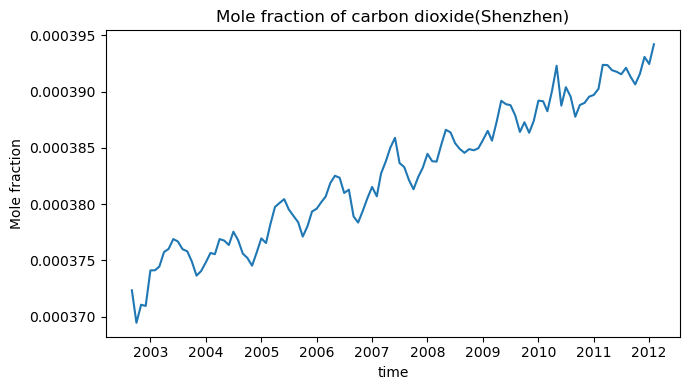

In [348]:
#Question3_2_1

#1. 深圳co2摩尔分数变化图（2002年-2012年）

#绘制异常值，逐月
plt.figure(figsize=(7,4),dpi=100)
plt.plot(Carbon_dioxide.time,Carbon_dioxide.sel(lon=114.06+180,lat=22.54,method='nearest'))

#添加标题和坐标名称，展示
plt.xlabel('time')
plt.ylabel('Mole fraction')
plt.title('Mole fraction of carbon dioxide(Shenzhen)')
plt.tight_layout()
plt.show()

#可以看到：季节性变化明显，总体呈持续上升趋势

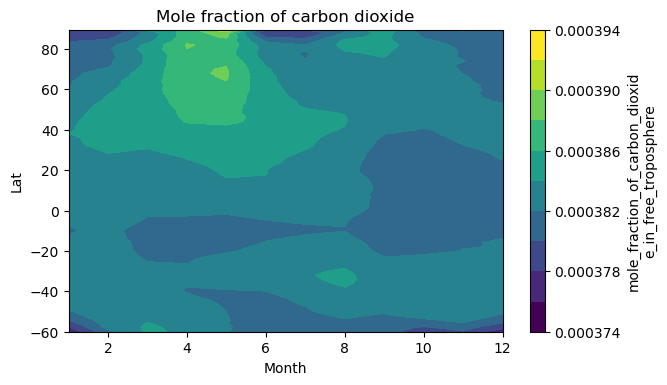

In [349]:
#Question3_2_2

#2. 绘制全球平均气候学等值线图

#设置画板
plt.figure(figsize=(7,4),dpi=100)

#绘图
Carbon_dioxide_climatology.mean(dim='lon').plot.contourf(x='month', levels=10)

#加标题，显示图
plt.xlabel('Month')
plt.ylabel('Lat')
plt.title('Mole fraction of carbon dioxide')
plt.show()

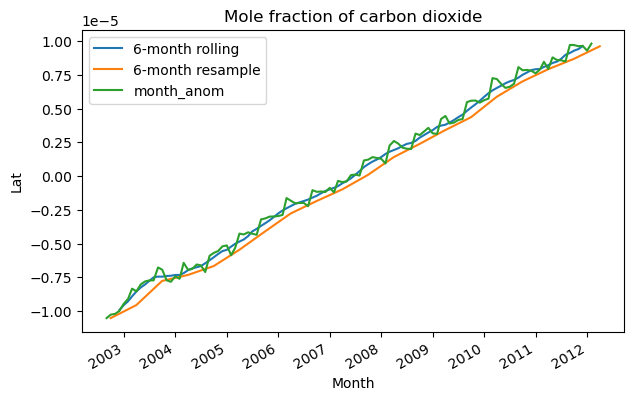

In [350]:
#Question3_2_3

#3. 绘制滑动平均、重采样和原始数据图并比较区别

#设置画板
plt.figure(figsize=(7,4),dpi=100)

#滑动平均
Carbon_dioxide_anom_rolling = Carbon_dioxide_anom.rolling(time=6, center=True).mean()
Carbon_dioxide_anom_rolling.plot(label="6-month rolling")

#重采样
ds_anom_resample =  Carbon_dioxide_anom.resample(time="6M").mean()
ds_anom_resample.plot(
    label="6-month resample")

#原数据
plt.plot(Carbon_dioxide_anom.time,Carbon_dioxide_anom,label="month_anom")

#加标题，显示图
plt.xlabel('Month')
plt.ylabel('Lat')
plt.title('Mole fraction of carbon dioxide')
plt.legend()
plt.show()

#描述：
#1. 滑动平均较原始数据更平滑，峰值和谷值削弱
#2. 重采样数据也较平滑，但较滑动和原始值偏小，分析原因为：
#取时段中间值时，由于在整个时段内是一直增的的，会导致值偏小，时段越长越明显

In [351]:
#Question3_2_4

#4. visualization using hvplot
#全球二氧化碳摩尔分数分布随时间变化过程

Carbon_dioxide.hvplot(groupby="time", clim=(Carbon_dioxide.min(), Carbon_dioxide.max()), cmap='turbo')

#说明：
#由于二氧化碳是气体所以不会显示出太大的区域差异，导致图颜色相差不大，但随时间变化比较大

:DynamicMap   [time]
   :Image   [lon,lat]   (mole_fraction_of_carbon_dioxide_in_free_troposphere)

D:\APP4\Anaconda\lib\site-packages\cartopy\crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\APP4\Anaconda\lib\site-packages\cartopy\crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\APP4\Anaconda\lib\site-packages\cartopy\crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
D:\APP4\Anaconda\lib\site-packages\cartopy\crs.py:385: ShapelyDeprecationWarning: Iteration over multi-part geometries is

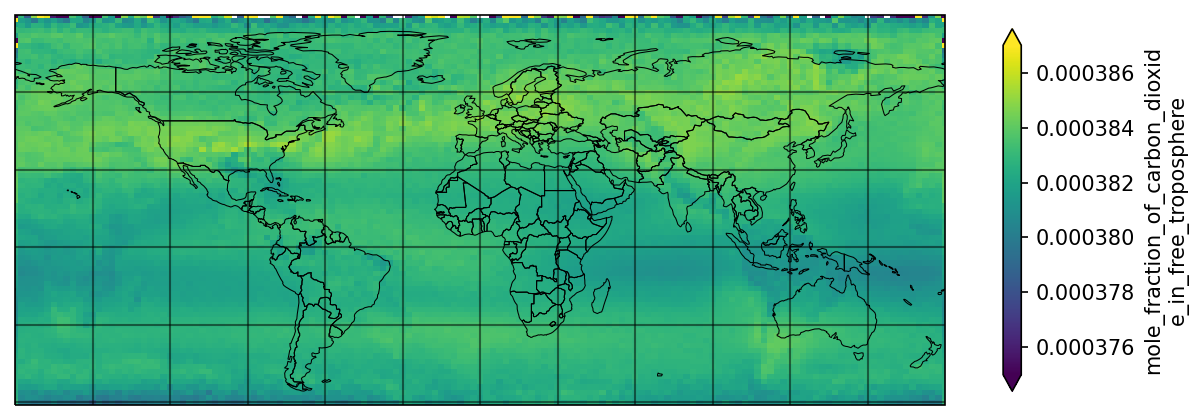

In [352]:
#Question3_2_5

#5. visualization using hvplot
#在地图上绘制摩尔分数分布

#说明：
#在地图上绘制2002-2012年近10年的平均二氧化碳摩尔分数分布
#由于二氧化碳是气体所以不会显示出太大的区域差异，导致图颜色相差不大
#若换做温度等变量将比较明显

#警告内容较多的可能原因为：
#1. 原始数据的纬度范围为[-60,90]
#2. vmin, vmax设置不合理（这里为了把颜色调明显，值取得比较接近均值），仅作练习用！

# Create and define the size of a figure object 
plt.figure(figsize=(10,8), dpi=150)

# Create an axes with Orthographic projection style

#proj = ccrs.Orthographic(central_lon, central_lat) 
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)

# Plot the surface temperature
Carbon_dioxide.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=0.000375, vmax=0.000387, cbar_kwargs={'shrink': 0.4})

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))